In [28]:
# veri analizi için
import pandas as pd
import numpy as np
#Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
#Veri Yüklemek için 
from sklearn.datasets import load_diabetes
#Test,Modellemeve normalize etmek için 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#Test Score analizi
from sklearn.metrics import mean_absolute_error,r2_score,f1_score


In [2]:
diabets=load_diabetes()

In [3]:
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
df = pd.DataFrame(data=diabets.data, columns=diabets.feature_names)
df['target'] = diabets.target

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Keşifsel Veri Analizi (EDA)
* Veri setini inceleyerek özelliklerin istatistiksel dağılımını gör.
* Hangi özellikler diyabet (target) ile daha fazla ilişkiye sahip?
* İlgili görselleştirmeleri yap: dağılım grafikleri, korelasyon matrisi vb.

## Yapılacaklar:
* Histogramlar ile özelliklerin dağılımını incele.
* Korelasyon matrisi çıkar ve hedef değişken ile en güçlü ilişkiye sahip özellikleri belirle.

<function matplotlib.pyplot.show(close=None, block=None)>

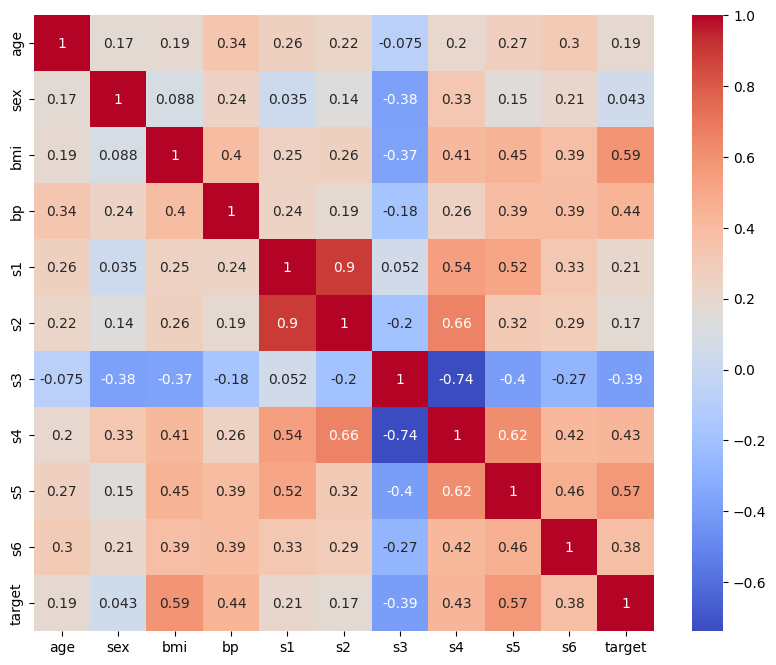

In [8]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show

## Veri Ön İşleme
* Eğer veri setinde eksik veri (missing data) varsa, bunları kontrol et.
* Sayısal özellikleri normalize et veya standardize et.
* Veriyi eğitim ve test setlerine böl (örneğin, %80 eğitim, %20 test).

In [9]:
X=df.drop("target", axis=1)
y=df["target"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

#StandardScaler ile veriyi standardize etme
sclar=StandardScaler()
X_train_scled=sclar.fit_transform(X_train)
X_test_scled=sclar.fit_transform(X_test)

## Model Seçimi ve Eğitimi
* En az 2 farklı makine öğrenmesi algoritması kullanarak modeli eğit.
* Önerilen algoritmalar: Lojistik Regresyon, Karar Ağaçları, Rastgele Ormanlar, K-En Yakın Komşu (KNN), veya Doğrusal Regresyon.
* Model performansını doğrulama seti üzerinde değerlendir (örn. Mean Squared Error (MSE), R², accuracy vb.).

In [10]:
#model Eğitimi (Linear Regression)
linear_model=LinearRegression()

linear_model.fit(X_train_scled,y_train)

# Test Seti Üzerinde Tahmin bulma

y_pred=linear_model.predict(X_test_scled)

msn=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Ortalama Kare Hatası:{msn}')
print(f'R2 Score:{r2}')

Ortalama Kare Hatası:43.24547555275301
R2 Score:0.4388889416894727


In [14]:
# Veriyi Hazılama
knn_X=df.drop('target',axis=1)
knn_y=df["target"]

knn_X_train, knn_X_test, knn_y_train, knn_y_test= train_test_split(knn_X,knn_y, test_size=0.2, random_state=42)
#veriyi standardize etme
knn_sclar=StandardScaler()
knn_X_train_scled=sclar.fit_transform(knn_X_train)
knn_X_test_scled=sclar.fit_transform(knn_X_test)


In [42]:
#Model eğitimi (KNN)
knn=KNeighborsRegressor(n_neighbors=9)

knn.fit(X_train,y_train)

# Test Seti Üzerinde Tahmin bulma
knn_y_pred=knn.predict(knn_X_test_scled)

knn_msn=mean_absolute_error(knn_y_test,knn_y_pred)

knn_r2=r2_score(knn_y_test,knn_y_pred)

print(f'KNN Ortalama Kare Hatası:{knn_msn}')
print(f'KNN R2 Score:{knn_r2}')


KNN Ortalama Kare Hatası:49.200998751560554
KNN R2 Score:0.2652133383976709


C:\Users\Hüseyin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [45]:

from sklearn.model_selection import GridSearchCV


# Hiperparametre arama için parametreler
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Farklı k değerleri deniyoruz

# GridSearchCV nesnesini oluşturuyoruz
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')


# Eğitim verisi ile GridSearchCV'yi eğitme
grid_search.fit(knn_X_train_scled, y_train)


# En iyi K değerini
print(f"Best K: {grid_search.best_params_}")



Best K: {'n_neighbors': 9}


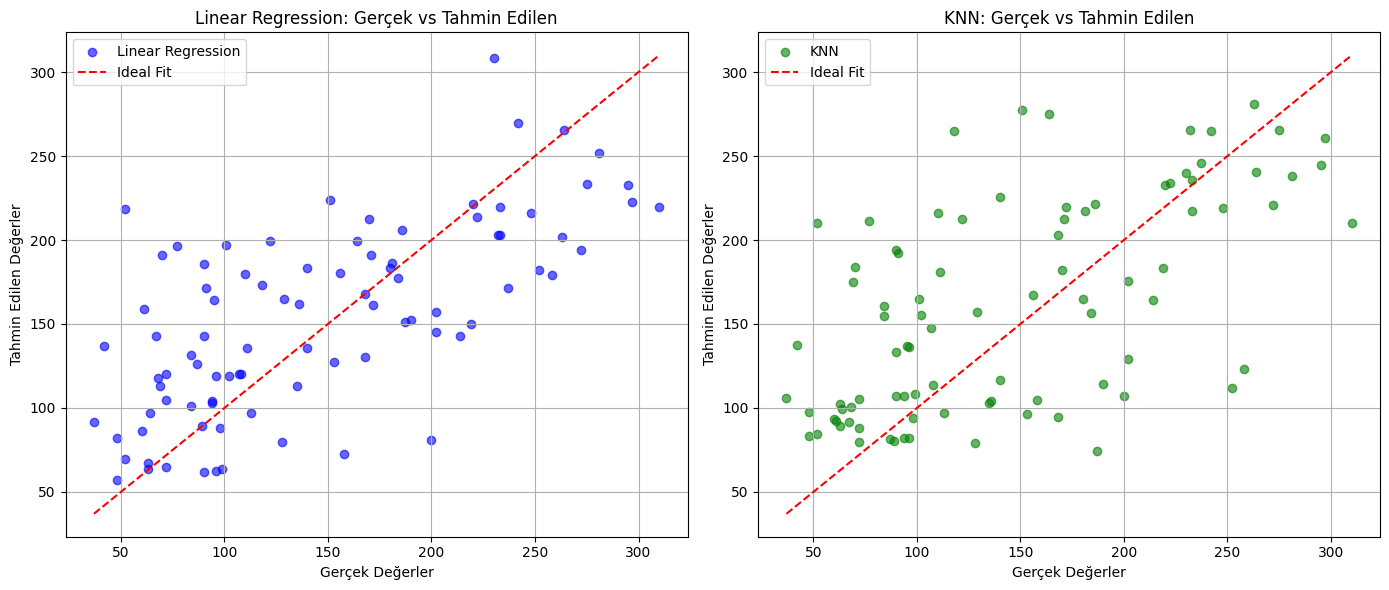

In [43]:
# Gerçek değerler
y_true = y_test

# Grafik ayarları
plt.figure(figsize=(14, 6))

# Linear Regression sonuçlarını çizme
plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Linear Regression')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Gerçek vs Tahmin Edilen')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.grid()

# KNN sonuçlarını çizme
plt.subplot(1, 2, 2)
plt.scatter(y_true, knn_y_pred, color='green', alpha=0.6, label='KNN')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('KNN: Gerçek vs Tahmin Edilen')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.grid()

# Grafiği gösterme
plt.tight_layout()
plt.show()
